In [2]:
"""
@author: Vincent Maillou (vmaillou@iis.ee.ethz.ch)
@author: Lisa Gaedke-Merzhaeuser  (lisa.gaedke.merzhaeuser@usi.ch)
@date: 2023-11

Tests for cholesky selected decompositions routines.

Copyright 2023 ETH Zurich and USI. All rights reserved.
"""

from sdr.utils import matrix_generation

from sdr.cholesky.cholesky_decompose import chol_dcmp_ndiags

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import pytest


In [4]:
nblocks = 6
ndiags = 7
blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_block_ndiags(nblocks, ndiags, blocksize, symmetric, diagonal_dominant, seed
)



[[ 8.89017237  0.44437467  0.72073122  0.70885162  1.50898967  0.50907445
   1.31172609  1.47066056  0.          0.          0.          0.        ]
 [ 0.44437467  8.15321592  1.51256005  0.58274231  0.4406421   0.97849327
   0.94789106  1.14382222  0.          0.          0.          0.        ]
 [ 0.72073122  1.51256005 11.74062964  1.70803629  0.50398663  1.6170549
   0.97006927  0.31586071  0.82295048  0.89296262  0.          0.        ]
 [ 0.70885162  0.58274231  1.70803629 10.5656777   0.92374952  0.90351455
   0.94977634  1.22211383  1.13882787  0.82875736  0.          0.        ]
 [ 1.50898967  0.4406421   0.50398663  0.92374952 14.05616977  1.67321906
   1.30304635  1.33061583  1.4098186   1.0218782   0.90746953  0.82661102]
 [ 0.50907445  0.97849327  1.6170549   0.90351455  1.67321906 14.90603797
   1.42173504  1.85336668  1.28657385  1.33761872  0.91152285  1.41375922]
 [ 1.31172609  0.94789106  0.97006927  0.94977634  1.30304635  1.42173504
  12.43117439  1.59289611  0.5594

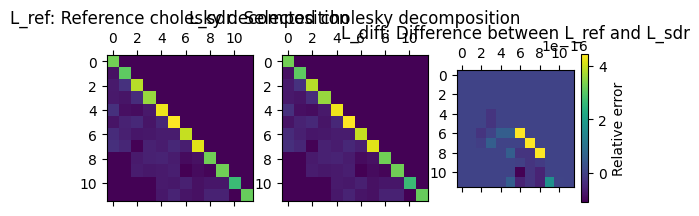

In [5]:

# --- Decomposition ---

fig, ax = plt.subplots(1, 3)
L_ref = la.cholesky(A, lower=True)
ax[0].set_title("L_ref: Reference cholesky decomposition")
ax[0].matshow(L_ref)

L_sdr = chol_dcmp_ndiags(A, ndiags, blocksize)
ax[1].set_title("L_sdr: Selected cholesky decomposition")
ax[1].matshow(L_sdr)

L_diff = L_ref - L_sdr
ax[2].set_title("L_diff: Difference between L_ref and L_sdr")
ax[2].matshow(L_diff)
fig.colorbar(ax[2].matshow(L_diff), ax=ax[2], label="Relative error", shrink=0.4)

plt.show()


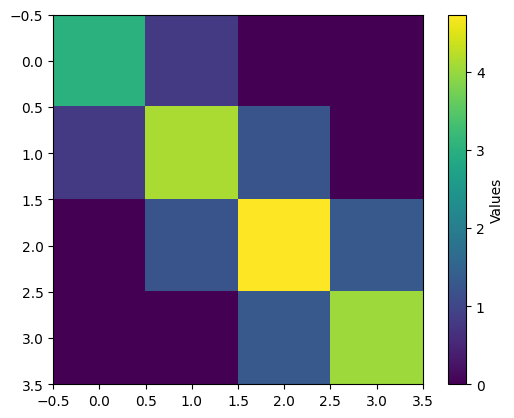

In [18]:
nblocks = 4 ## number of diagonal blocks
ndiags = 3  ## counts total number of diagonal bands -> tridiagonal case -> 3
blocksize = 1 ## size of each diagonal block
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_block_ndiags(nblocks, ndiags, blocksize, symmetric, diagonal_dominant, seed
)

#print(A)

plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Values')
plt.show()

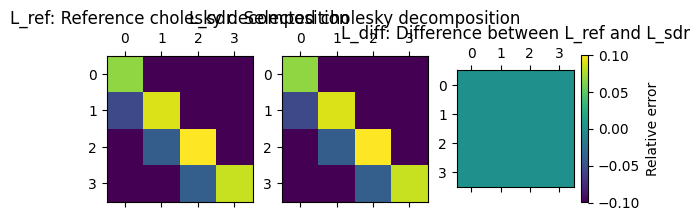

In [19]:
# --- Decomposition ---

fig, ax = plt.subplots(1, 3)
L_ref = la.cholesky(A, lower=True)
ax[0].set_title("L_ref: Reference cholesky decomposition")
ax[0].matshow(L_ref)

L_sdr = chol_dcmp_ndiags(A, ndiags, blocksize)
ax[1].set_title("L_sdr: Selected cholesky decomposition")
ax[1].matshow(L_sdr)

L_diff = L_ref - L_sdr
ax[2].set_title("L_diff: Difference between L_ref and L_sdr")
ax[2].matshow(L_diff)
fig.colorbar(ax[2].matshow(L_diff), ax=ax[2], label="Relative error", shrink=0.4)

plt.show()